# BST plots

In [1]:
from sst_bst import BSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
def P2dB(X): 
    return 10*np.log10(X+1e-3)

In [26]:
START_TIME="2022-12-17 00:00:00"
END_TIME=  "2022-12-19 00:00:10"
tstart=datetime.fromisoformat(START_TIME) 
step_mins=15;
filename="BST_%s_%s_%i.npy"%(START_TIME,END_TIME,step_mins)
bst=BSTs('bst') #start 11-25 11:58
try:
    D=np.load(filename)
except:
    
    tend  =datetime.fromisoformat(END_TIME)
    D=bst.getData_percentile(tstart,tend,60*step_mins,percentile=30) #5 min avg
    np.save(filename,D)
finally:
    print(D.shape)

Load BST bst/BST_2022-12-16-23-32-22.h5
Load BST bst/BST_2022-12-17-00-32-22.h5
Load BST bst/BST_2022-12-17-01-32-22.h5
Load BST bst/BST_2022-12-17-02-32-22.h5
Load BST bst/BST_2022-12-17-03-32-22.h5
Load BST bst/BST_2022-12-17-04-32-22.h5
Load BST bst/BST_2022-12-17-05-32-22.h5
Load BST bst/BST_2022-12-17-06-32-22.h5
Load BST bst/BST_2022-12-17-07-32-22.h5
Load BST bst/BST_2022-12-17-08-32-22.h5
Load BST bst/BST_2022-12-17-09-32-22.h5
Load BST bst/BST_2022-12-17-10-32-22.h5
Load BST bst/BST_2022-12-17-11-32-22.h5
Load BST bst/BST_2022-12-17-12-32-22.h5
Load BST bst/BST_2022-12-17-13-32-22.h5
Load BST bst/BST_2022-12-17-14-32-22.h5
Load BST bst/BST_2022-12-17-15-32-22.h5
Load BST bst/BST_2022-12-17-16-32-22.h5
Load BST bst/BST_2022-12-17-17-32-22.h5
Load BST bst/BST_2022-12-17-18-32-22.h5
Load BST bst/BST_2022-12-17-19-32-22.h5
Load BST bst/BST_2022-12-17-20-32-22.h5
Load BST bst/BST_2022-12-17-21-32-22.h5
Load BST bst/BST_2022-12-17-22-32-22.h5
Load BST bst/BST_2022-12-17-23-32-22.h5


In [27]:
D2=P2dB(D.reshape([D.shape[0],2,488,2])[:,0,:,:])
print(D2.shape)

(192, 488, 2)


In [28]:
def makeBeams(R0=0.1,ra_hr=23+23./60+24./3600,dec_deg=58+48./60+54./3600):
    uv_step=0.25
    X=np.arange(-1,1.01,uv_step)*R0
    N=len(X)
    I=np.ones([len(X)])
    Y=np.outer(I,X)
    X=np.outer(X,I)
    R=np.sqrt(X*X+Y*Y)
    mask=R<R0
    theta=np.arccos(R*mask)#/np.pi*180
    phi=np.angle(X+1j*Y)#/np.pi*180
    x0=np.cos(theta)*np.sin(phi)
    y0=np.cos(theta)*np.cos(phi)
    z0=np.sin(theta)
    ang1=(90-dec_deg)/180*np.pi;
    x1=x0;
    y1= y0*np.cos(ang1)+z0*np.sin(ang1)
    z1=-y0*np.sin(ang1)+z0*np.cos(ang1)
    ang2=ra_hr/24*360 #deg
    ang2=ang2/180*np.pi; #rad
    x2= x1*np.cos(ang2)+y1*np.sin(ang2)
    y2=-x1*np.sin(ang2)+y1*np.cos(ang2)
    z2=z1

    theta2=np.arcsin(z2)
    phi2=np.arctan(x2/y2)

    #print("Number of beams:",np.sum(mask))
    index=np.array(range(N*N))
    indexC=np.compress(mask.flatten(),index)
    NC=len(indexC)
    thetaC=np.compress(mask.flatten(),theta2.flatten())
    phiC=np.compress(mask.flatten(),phi2.flatten())#+2*np.pi
    return thetaC,phiC,indexC,N
#    return thetaC,phiC
#plt.imshow(makeMat(N,indexC,phiC))
def makeMat(N,indexC,varC,zeros=None):
    D=np.zeros([N*N])
    D[:]=zeros
    D[indexC]=varC
    D=D.reshape([N,N])
    return D


In [29]:
freqs_MHz=[32, 40, 50, 60,69.9]
theta,phi,indexC,N=makeBeams(R0=0.1,ra_hr=23.39,dec_deg=58.815)
Npnt=len(theta)
Nsun=Npnt*len(freqs_MHz)
print(Npnt,Nsun)
beam_angles=[]
for x,freq in enumerate(freqs_MHz):
    theta,phi,indexC,N=makeBeams(R0=0.08*(50/freq),ra_hr=23.39,dec_deg=58.815)
    beam_angles.append([theta,phi,indexC,N])

45 225


['2022-12-17 00:00:00.000' '2022-12-17 00:15:00.000'
 '2022-12-17 00:30:00.000' '2022-12-17 00:45:00.000'
 '2022-12-17 01:00:00.000']
(192,)


(-1.0, 1.0)

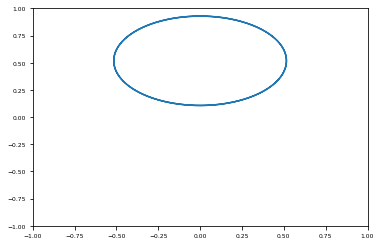

In [30]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.time import Time
import astropy.units as u
CasA = SkyCoord.from_name('Cas A')
CygA = SkyCoord.from_name('Cyg A')
#Sun = SkyCoord.from_name('Sun')
stars=[CasA]#,CygA]
ASTRON=EarthLocation(lat=52.811186*u.deg,lon=6.395318*u.deg,height=50*u.m);
hours=np.arange(D.shape[0])*step_mins/60
time=Time(START_TIME) +hours*u.hour
print(time[:5])
from astropy.coordinates import AltAz
#el=[]
#altazs=[]
XY=[]
for star in stars:
    altaz = star.transform_to(AltAz(obstime=time,location=ASTRON))
    alt=altaz.alt.value/180*np.pi
    az=altaz.az.value/180*np.pi
    #altazs.append([altaz.alt.value,altaz.az.value])
    Y=np.cos(alt)*np.cos(az)
    X=np.cos(alt)*np.sin(az)
    print(Y.shape)
    XY.append([X,Y])
    #el.append(90-np.arcsin(Y)/np.pi*180)
#XY=np.array(XY);
#print(XY.shape)
for xy in XY:
    plt.plot(-xy[0],xy[1])
plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.xlabel("elevation")

In [36]:
def plotpos(time_slot):
    ax = plt.gca()
    ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
    ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
    ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
    plt.text( -0.05 , 0.9 ,'N',color='y',fontsize=8)
    plt.text( 0.87 , 0.0 ,'W',color='y',fontsize=8)
    plt.text(-0.98, 0.0 ,'E',color='y',fontsize=8)
    plt.text(-0.05,-0.95,'S',color='y',fontsize=8)
    for xy in XY:
        plt.plot(-xy[0][time_slot],xy[1][time_slot],'kx',markersize=5)
    plt.axis("off")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
plt.figure()
plotpos(0)

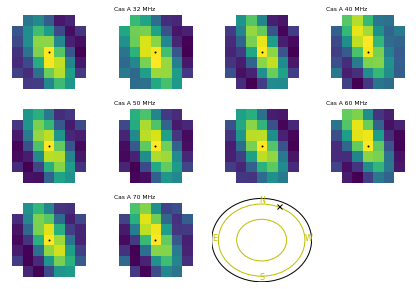

In [37]:
def Makeplots(timestep):
    bstX=D2[timestep,:,0]
    bstY=D2[timestep,:,1]
    for x,[theta,phi,indexC,N] in enumerate(beam_angles):
        plt.subplot(3,4,2*x+1)
        plt1=plt.imshow(makeMat(N,indexC,(bstX[x*Npnt:(x+1)*Npnt])))
        plt.plot([N//2],[N//2],'k.',markersize=2)
        plt.xlim(0,N-1);plt.ylim(0,N-1)
        plt.axis("off")
        plt.tight_layout()
        plt.subplot(3,4,2*x+2)
        plt1=plt.imshow(makeMat(N,indexC,(bstY[x*Npnt:(x+1)*Npnt])))
        plt.axis("off")
        plt.plot([N//2],[N//2],'k.',markersize=2)
        plt.xlim(0,N-1);plt.ylim(0,N-1)
        plt.text(0,N-1,'Cas A %.0f MHz'%(freqs_MHz[x]))
        plt.tight_layout()
    plt.subplot(3,4,11)
    plotpos(timestep)
#    plt.plot(freqs,P2dB(bst.bst_r[0][Nsun*2:Nsun*2+512:2])-GainADC,label=("Sun X"))
#    plt.xlim(0,100);plt.ylim(-91,-30);plt.legend()
#    plt.tight_layout()
#    plt.subplot(3,4,12)
#    plt.plot(freqs,P2dB(bst.bst_r[0][Nsun*2:Nsun*2+512:2])-GainADC,label=("Sun Y"))
#    plt.xlim(0,100);plt.ylim(-91,-30);plt.legend()
#    plt.tight_layout()
Makeplots(10)

In [39]:
from time import sleep
from IPython.display import clear_output
import matplotlib
fig_files = []
matplotlib.rcParams.update({'font.size': 6})
for x in range(D.shape[0]):
#for x in range(10):
#    if not(time_mask[x]): continue;
    clear_output(wait=True)
    plt.figure(figsize=(5,3),dpi=100) #5,3 for daily image
    Makeplots(x)
    plt.subplot(3,4,1)
    plottime=tstart+timedelta(hours=hours[x])
    plt.title(f"{plottime.isoformat()}") 
    file_name = 'map_' + str(x) + '.png'
    fig_files.append(file_name)
    plt.savefig(file_name,bbox_inches='tight',quality=100)
    plt.show();
#    sleep(0.2)

In [40]:
import imageio
with imageio.get_writer('beams_skymap_30_LBA.gif', mode='I') as writer:
    for filename in fig_files:
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_1372749/182520119.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [41]:
!rm map_*.png
#!rm map_*.eps
#!rm map_*.jpg


In [ ]:
plt.figure(dpi=300)
plt.plot(P2dB(D[:,0,2*484]),label='484-X')
plt.plot(P2dB(D[:,0,2*485]),label='485-X')
plt.plot(P2dB(D[:,0,2*486]),label='486-X')
#for x in range(488):
#    plt.plot(P2dB(D[:,0,2*x]),'k:',linewidth=0.1)
plt.legend(ncol=3,fontsize='small')
plt.grid()
plt.xlabel('Hours since ' + START_TIME)
plt.ylabel('Power dB')
plt.title('Beam Stati')

(70.0, 72.0)

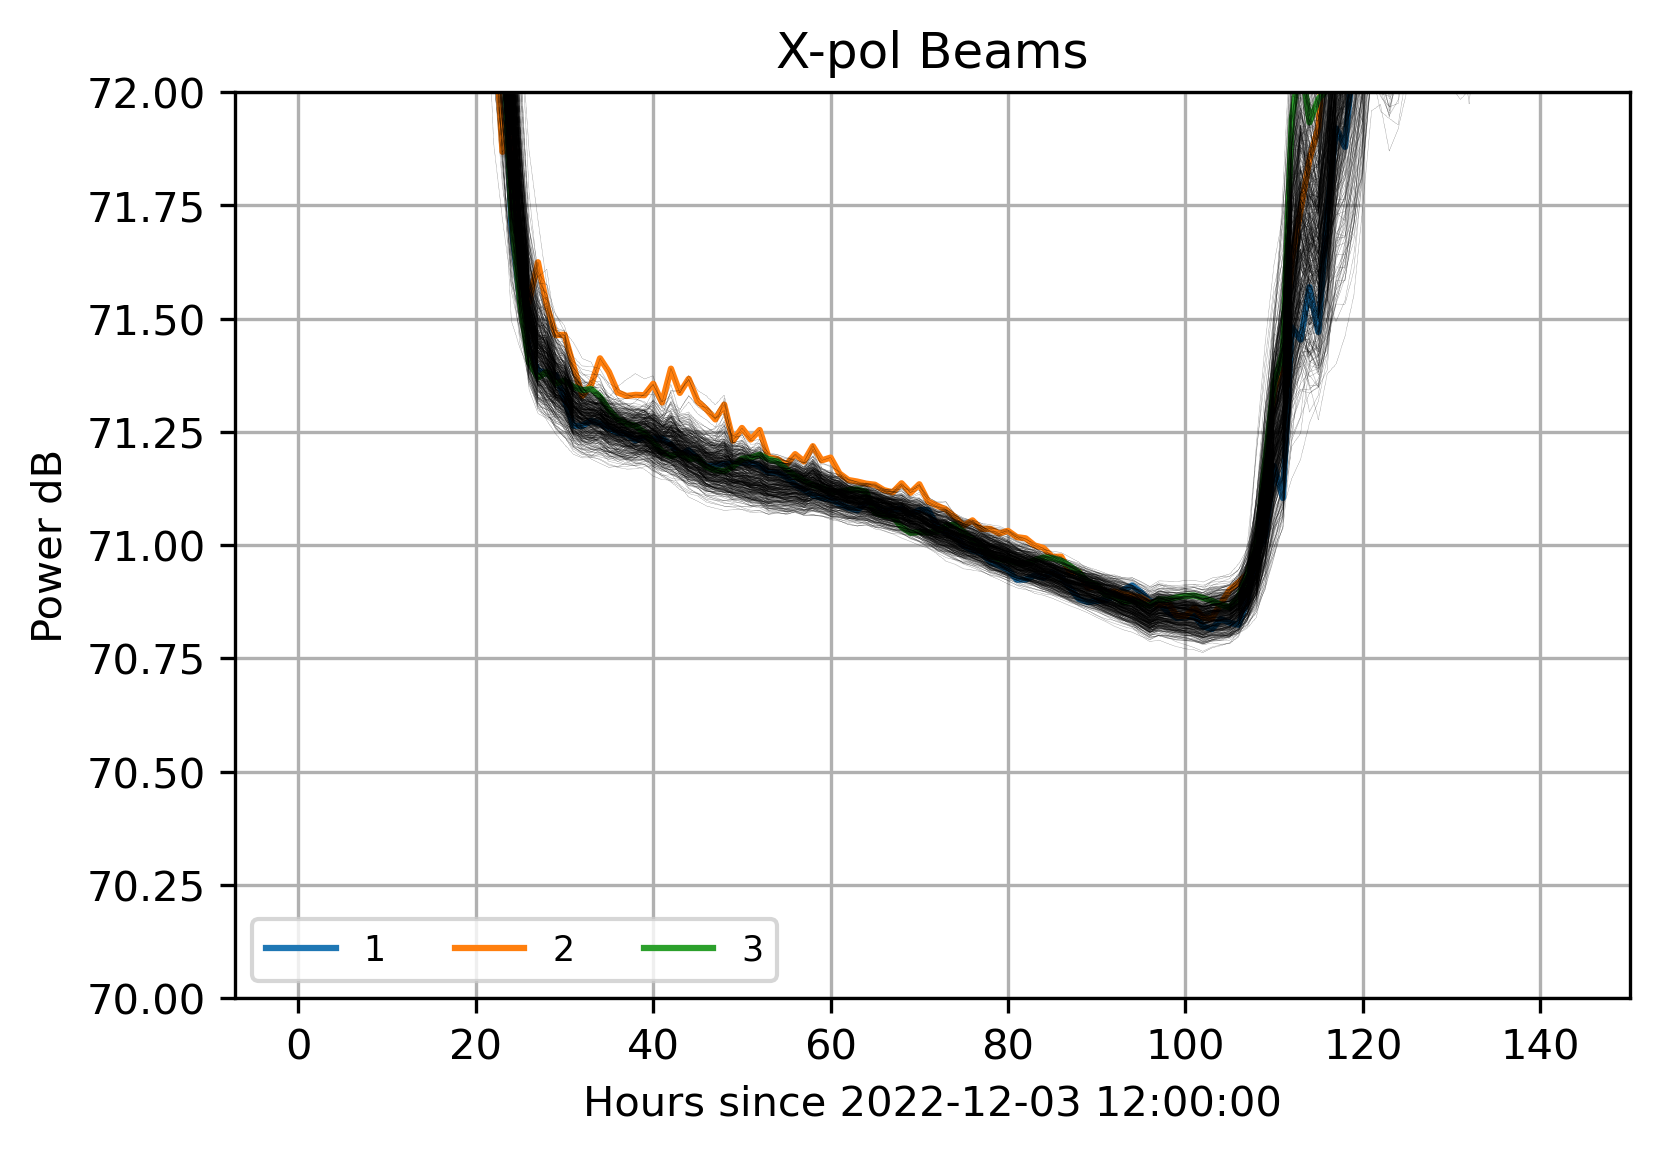

In [109]:
plt.figure(dpi=300)
plt.plot(P2dB(D[:,0,2*484+1]),label='1')
plt.plot(P2dB(D[:,0,2*485+1]),label='2')
plt.plot(P2dB(D[:,0,2*486+1]),label='3')
for x in range(488):
    plt.plot(P2dB(D[:,0,2*x+1]),'k:',linewidth=0.1)
plt.legend(ncol=3,fontsize='small')
plt.grid()
plt.xlabel('Hours since ' + START_TIME)
plt.ylabel('Power dB')
plt.title('X-pol Beams')
plt.ylim(70,72)

In [68]:
plt.pcolor?